In [1]:
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math

def third_function_pdf(x,x0, sigma):
    numerator = np.exp(-np.power(x - x0, 2.) / (2 * sigma**2)) * (1/ (sigma*np.sqrt(2 * np.pi))) - np.exp(-np.power(x + x0, 2.)/ (2 * sigma**2)) * (1/ (sigma * np.sqrt(2 * np.pi)))
    return erf(x0/math.sqrt(2*sigma)) * numerator

## Exercise 4



This Cell prepares my sampler to generate gaussian points.

In [2]:
pdf_object = interpolation.PDF()
utility = interpolation.Util()
x_gauss = np.linspace(-5, 5, 500)
y_gauss = [pdf_object.gaussian_oned_pdf(a,0,1) for a in x_gauss]
gauss_generator = interpolation.LinearInterp(x_gauss, y_gauss, [-3,3])


This Cell defines the covariance and correlation function. They are also in the interpolation.py file.

In [3]:
def covariance_func(x,y, x_mean, y_mean):
    sum_list = []
    for a in range(0, len(x)):
        sum_list.append((x[a]-x_mean)*(y[a]-y_mean) / (len(x) - 1))
    return np.sum(sum_list)

def correlation_func(cov, sigmax, sigmay):
    return cov/(sigmax * sigmay)

Next, we generate points for the uniform and gaussian points, compute their mean, mean deviation, covariance and correlation, in order to make a scatter plot.

Cov:0.04160912445830662, Corr:0.2721083803389004
Cov:0.00810890447747184, Corr:0.028281915712859658
Cov:-0.009834020490130812, Corr:-0.033143116146818107
Cov:0.005047509592145555, Corr:0.017734755223479483


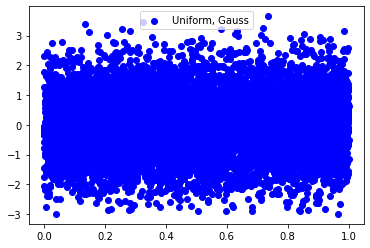

In [4]:
data_1 = []
data_2 = []
data_3 = []
N_list = [10,100,1000,10000]
for N in N_list:
    data_list_g = []
    data_list_u = []
    for c in range(0,N):
        point_gauss = gauss_generator.generate_random_point()[0]
        point_uniform = rd.random()
        data_list_g.append(point_gauss)
        data_list_u.append(point_uniform)
    mean_g = utility.mean_function(data_list_g)
    mean_u = utility.mean_function(data_list_u)
    sigma_g = np.sqrt(utility.var_function(data_list_g,mean_g) )
    sigma_u = np.sqrt(utility.var_function(data_list_u,mean_u))
    cov = covariance_func(data_list_u, data_list_g, mean_u, mean_g)
    corr = correlation_func(cov, sigma_u, sigma_g)
    print(f'Cov:{cov}, Corr:{corr}')
    data_1.append(corr)
plt.scatter(data_list_u, data_list_g, color='blue', label='Uniform, Gauss' )
plt.legend()
plt.show()
    
    

We need 100 points for the Covariance to reach 0 up to 2 decimals.
    

We do the same for the letter (b) and (c) of the exercises.

Cov:-0.04342528230191417, Corr:-0.1567288082410458
Cov:0.10086982094630292, Corr:0.34485517636076246
Cov:0.07733656218760593, Corr:0.2611563182472368
Cov:0.07817990462959695, Corr:0.2629686945760877


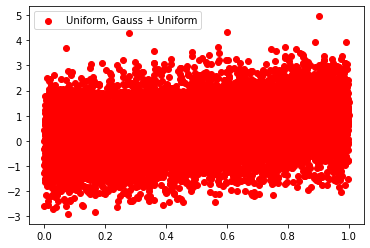

In [5]:
for N in N_list:
    data_list_g = []
    data_list_u = []
    for c in range(0,N):
        point_gauss = gauss_generator.generate_random_point()[0]
        point_uniform = rd.random()
        data_list_g.append(point_gauss + point_uniform)
        data_list_u.append(point_uniform)
    mean_g = utility.mean_function(data_list_g)
    mean_u = utility.mean_function(data_list_u)
    sigma_g = np.sqrt(utility.var_function(data_list_g,mean_g) )
    sigma_u = np.sqrt(utility.var_function(data_list_u,mean_u))
    cov = covariance_func(data_list_u, data_list_g, mean_u, mean_g)
    corr = correlation_func(cov, sigma_u, sigma_g)
    print(f'Cov:{cov}, Corr:{corr}')
    data_2.append(corr)
plt.scatter(data_list_u, data_list_g, color='red', label='Uniform, Gauss + Uniform' )
plt.legend()
plt.show()

Cov:-0.16122323964676977, Corr:-0.7572017106348139
Cov:-0.07465305296644277, Corr:-0.2728097193641779
Cov:-0.06924747929949163, Corr:-0.23462924850720707
Cov:-0.08409503677884957, Corr:-0.2793372574575056


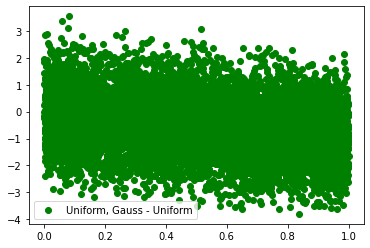

In [6]:
for N in N_list:
    data_list_g = []
    data_list_u = []
    for c in range(0,N):
        point_gauss = gauss_generator.generate_random_point()[0]
        point_uniform = rd.random()
        data_list_g.append(point_gauss - point_uniform)
        data_list_u.append(point_uniform)
    mean_g = utility.mean_function(data_list_g)
    mean_u = utility.mean_function(data_list_u)
    sigma_g = np.sqrt(utility.var_function(data_list_g,mean_g) )
    sigma_u = np.sqrt(utility.var_function(data_list_u,mean_u))
    cov = covariance_func(data_list_u, data_list_g, mean_u, mean_g)
    corr = correlation_func(cov, sigma_u, sigma_g)
    print(f'Cov:{cov}, Corr:{corr}')
    data_3.append(corr)
plt.scatter(data_list_u, data_list_g, color='green', label='Uniform, Gauss - Uniform' )
plt.legend()
plt.show()

The correlation value for the first case is closer to 0 since there is no correlation between the variables. When we sum the values of the uniform distribution to the $y$ points, we create a correlation between $x$ and $y$, which can be seen on the non-null correlation value for higher volume of points. We can also see that this leads to a positive inclination on the second graph. The same occurs for the tird case, but with a minus sign, since we are creating a negative correlation by subtracting the points from the uniform distribution to the gaussian points.

## Exercise 5

This exercise shows that a binomial distribution with a large amount of points, mantaining $\lambda = np$ constant, is equivalent to a poisson distribution $\lambda$.

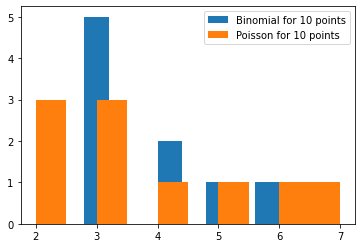

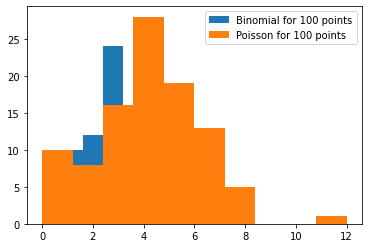

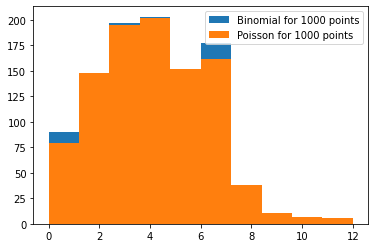

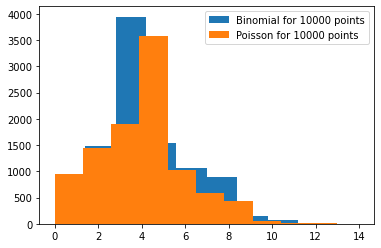

In [7]:
N_list = [10,100,1000,10000]
lamb = 4
for N in N_list:
    poisson_points = [np.random.poisson(lamb) for a in range(0,N)]
   # plt.plot(np.linspace(0,N,N, dtype=int), binomial_points, '.')
    p = lamb/N
    binomial_points = [pdf_object.coin_toss(N, p)[0] for a in range(0,N)]
    plt.hist(binomial_points, label=f'Binomial for {N} points')
    plt.hist(poisson_points, label=f'Poisson for {N} points')
    plt.legend()
    plt.show()

## Exercise 6

A poisson distribtuion with a high value of $\lambda$ tends to a gaussian distribution.

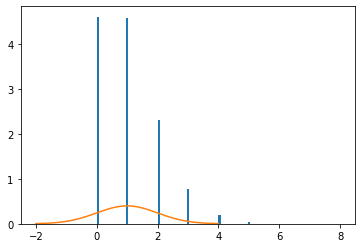

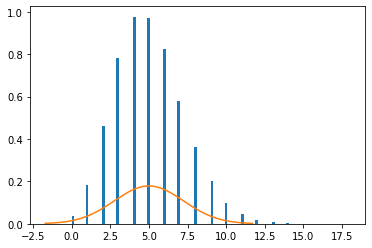

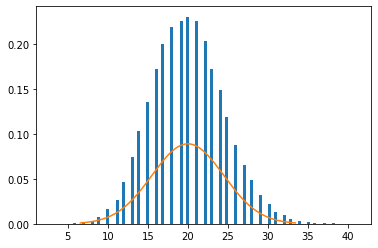

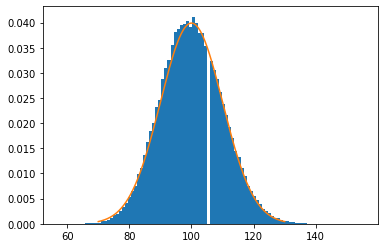

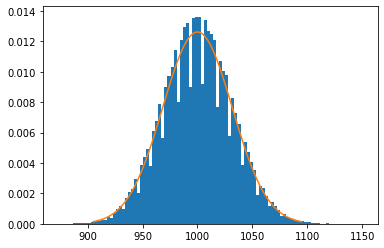

In [8]:
N=100000
lamb_list = [1,5,20,100,1000]
for lamb in lamb_list:
    poisson_points = np.random.poisson(lamb,N)
    x_list = np.linspace(lamb-3*math.sqrt(lamb),lamb+3*math.sqrt(lamb),1000)
    gaussian_points = [pdf_object.gaussian_oned_pdf(a, lamb, math.sqrt(lamb)) for a in x_list]
    plt.hist(poisson_points, label=f'Lambda={lamb}', bins=100, density=True)
    plt.plot(x_list, gaussian_points)
    plt.show()

## Exercise 7

Making a variable change to 
\begin{align}
x^{\prime} &= \frac{x-\mu_x}{\sigma_x},  \quad\text{and}\quad y^{\prime} = \frac{y-\mu_y}{\sigma_y}
\end{align}

and then 

\begin{align}
x^{\prime} = r \cos(\theta), \quad \text{and} \quad y^{\prime} = r \sin(\theta)
,\end{align}

the limit $\chi < n^2$ leads to a circle with radius $\chi$ and the integral in polar coordinates become

\begin{align}
P(n\sigma) &=\frac{1}{2\pi}\int_0^{2\pi}\int_0^{\chi} e^{-\frac{1}{2}r^2} r drd\theta \nonumber \\
&= \frac{1}{2}\int_0^{\chi} e^{-\frac{u}{2}}  du\nonumber \\
&=1- e^{-\frac{\chi^2}{2}}
\end{align}

In [9]:
n_list = [1,2,3]
for n in n_list:
    numerator = -n**2 / 2
    result = 1 - np.exp(numerator) 
    print(f'{n}-sigma: {result}')

1-sigma: 0.3934693402873666
2-sigma: 0.8646647167633873
3-sigma: 0.9888910034617577


This results shows that for multivariate distributions the confidence leval is not the same as it is for the one-dimensional case. $n=1$ corresponds to 1-sigma confidence level, which led to $39\%$ of the two-dimensional gaussian points. In the case of the one-dimensional gaussian, this confidence level would had led to $68\%$ of the points.

## Exercise 8
To do the same calculation for the distribution in equation 3.24, we need to make the variable changes
\begin{align}
x^{\prime} &= \frac{1}{(1 - \rho^2)^{\frac{1}{2}}}\frac{x-\mu_x}{\sigma_x},  \quad\text{and}\quad y^{\prime} = \frac{1}{(1 - \rho^2)^{\frac{1}{2}}}\frac{y-\mu_y}{\sigma_y}
\end{align}
and
\begin{align}
x^{\prime} &= \frac{\sqrt{2}}{2} U_1 + \frac{\sqrt{2}}{2} U_2,  \quad\text{and}\quad y^{\prime} = \frac{\sqrt{2}}{2} U_1 - \frac{\sqrt{2}}{2} U_2
.\end{align}
Then, the final integral wil be
\begin{align}
P(n\sigma) &=\frac{1}{2}\int_0^{\frac{\chi}{1-\rho^2}} e^{-\frac{u}{2}} du
\end{align}

In [23]:
rho = 0.5
fator = 1- rho**2
n_list = [1/fator,2/fator,3/fator]
for n in n_list:
    numerator = -(n**2 * (1-rho**2)) / 2
    constant = math.sqrt(1-rho**2)
    result = (1 - np.exp(numerator))  
    print(f'{n*fator}-sigma: {result}')

1.0-sigma: 0.486582880967408
2.0-sigma: 0.9305165487771985
3.0-sigma: 0.9975212478233336
